In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r"C:\Users\OM RAJ PANDEY\Desktop\DSData-master\DSData-master\loan_prediction.csv")

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# number of rows and columns
df.shape

(614, 13)

In [6]:
#statistical measures
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


This function shows the description of numerical columns not the categorical.

In [7]:
#number of missing values in each column
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
#dropping the missing values
df=df.dropna()

In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

There is no null column in the dataset

In [10]:
#label encoding
df.replace({'Loan_Status':{'N':0, 'Y':1}},inplace=True)

In [11]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [12]:
#Dependent column values
df['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [13]:
#replacing the value of 3+ to 4
df=df.replace(to_replace='3+', value=4)

In [14]:
#dependent values
df['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

# Data Visualization

<AxesSubplot:xlabel='Education', ylabel='count'>

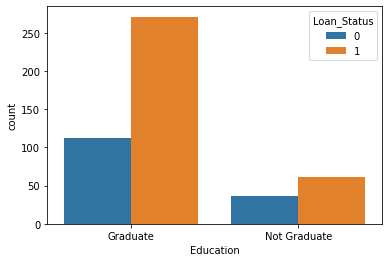

In [15]:
# education and Loan Status
sns.countplot(x='Education', hue='Loan_Status', data=df)

Graduate people more chance to get the loan

<AxesSubplot:xlabel='Married', ylabel='count'>

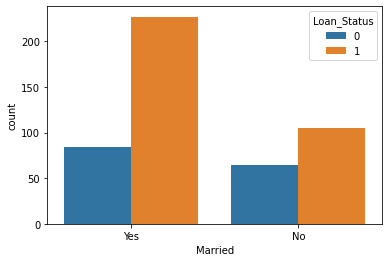

In [16]:
#marital status & Loan Status
sns.countplot(x='Married', hue='Loan_Status', data=df)

Married person more chance to get the loan

In [17]:
# convert categorical columns to numerical values
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
           'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [18]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


# Model Building

In [19]:
#separating the data and label
x=df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y=df['Loan_Status']

In [21]:
 print(x)
print(y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

# Train Test Split

In [22]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

In [23]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
adb=AdaBoostClassifier()

lr.fit(x_train, y_train)
dt.fit(x_train, y_train)
rf.fit(x_train, y_train)
adb.fit(x_train, y_train)

AdaBoostClassifier()

In [24]:
# classification score
print("lr classification score", lr.score(x_train, y_train))
print("dt classification score", dt.score(x_train, y_train))
print("rf classification score", rf.score(x_train, y_train))
print("adb classification score", adb.score(x_train, y_train))

lr classification score 0.7994791666666666
dt classification score 1.0
rf classification score 1.0
adb classification score 0.8645833333333334


# Model Evaluation

In [25]:
lr_ypred=lr.predict(x_test)
dt_ypred=dt.predict(x_test)
rf_ypred=rf.predict(x_test)
adb_ypred=adb.predict(x_test)

In [26]:
# Using confusion matrix in order to evaluate model accuracy
lr_conf_mat=confusion_matrix(y_test, lr_ypred)
print(lr_conf_mat)

[[16 14]
 [ 2 64]]


In [28]:
dt_conf_mat=confusion_matrix(y_test, dt_ypred)
print(dt_conf_mat)

[[17 13]
 [19 47]]


In [29]:
rf_conf_mat=confusion_matrix(y_test, rf_ypred)
print(rf_conf_mat)

[[17 13]
 [ 4 62]]


In [30]:
adb_conf_mat=confusion_matrix(y_test, adb_ypred)
print(adb_conf_mat)

[[18 12]
 [ 8 58]]


# Checking classification report for each model

In [31]:
lr_report=classification_report(y_test, lr_ypred)
print(lr_report)

              precision    recall  f1-score   support

           0       0.89      0.53      0.67        30
           1       0.82      0.97      0.89        66

    accuracy                           0.83        96
   macro avg       0.85      0.75      0.78        96
weighted avg       0.84      0.83      0.82        96



In [32]:
dt_report=classification_report(y_test, dt_ypred)
print(dt_report)

              precision    recall  f1-score   support

           0       0.47      0.57      0.52        30
           1       0.78      0.71      0.75        66

    accuracy                           0.67        96
   macro avg       0.63      0.64      0.63        96
weighted avg       0.69      0.67      0.67        96



In [33]:
rf_report=classification_report(y_test, rf_ypred)
print(rf_report)

              precision    recall  f1-score   support

           0       0.81      0.57      0.67        30
           1       0.83      0.94      0.88        66

    accuracy                           0.82        96
   macro avg       0.82      0.75      0.77        96
weighted avg       0.82      0.82      0.81        96



In [34]:
adb_report=classification_report(y_test, adb_ypred)
print(adb_report)

              precision    recall  f1-score   support

           0       0.69      0.60      0.64        30
           1       0.83      0.88      0.85        66

    accuracy                           0.79        96
   macro avg       0.76      0.74      0.75        96
weighted avg       0.79      0.79      0.79        96



# ROC AUC Curve:

In [35]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve

# importing the roc and auc from sklearn and predict the x_test and checking the roc_auc_score
print(roc_auc_score(y_test, lr.predict(x_test)))
print(roc_auc_score(y_test, dt.predict(x_test)))
print(roc_auc_score(y_test, rf.predict(x_test)))
print(roc_auc_score(y_test, adb.predict(x_test)))

0.7515151515151516
0.6393939393939394
0.753030303030303
0.7393939393939394


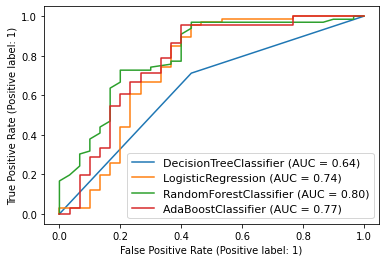

In [37]:
# lets find the roc curve to check the best fitted model
disp=plot_roc_curve(dt, x_test, y_test)
plot_roc_curve(lr, x_test, y_test, ax=disp.ax_)
plot_roc_curve(rf, x_test, y_test, ax=disp.ax_)
plot_roc_curve(adb, x_test, y_test, ax=disp.ax_)
plt.legend(prop={'size':11}, loc='lower right')


As per above observation we can see Random Forest Classifier give the best score.

# K-Fold Cross Validation:

In [38]:
from sklearn.model_selection import KFold, cross_val_score

k_f=KFold(n_splits=4, shuffle=True)
k_f

KFold(n_splits=4, random_state=None, shuffle=True)

In [40]:
print("Mean of Cross validation score for Random Forest model","=>", cross_val_score(rf, x, y, cv=5).mean())

Mean of Cross validation score for Random Forest model => 0.8020833333333333


# Hyperparameter Tuning:

In [41]:
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=10, stop=80, num=10)]
# Number of features to consider at every split
max_features=['auto', 'sqrt']
# Maximum number of levels in tree
max_depth=[2,4]
# Minimum number of samples required to split a node
min_samples_split=[2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf=[1, 2]
# Method of selecting samples for training each tree
bootstrap=[True, False]

In [43]:
# Create the param grid
param_grid={'n_estimators':n_estimators,
           'max_features':max_features,
           'max_depth':max_depth,
           'min_samples_split':min_samples_split,
           'min_samples_leaf':min_samples_leaf,
           'bootstrap':bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [44]:
rf_model=RandomForestClassifier()

In [45]:
from sklearn.model_selection import GridSearchCV
rf_grid=GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, verbose=2, n_jobs=4 )

In [46]:
rf_grid.fit(x_train, y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [47]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 64}

# Check Accuracy

In [49]:
print(f'Train Accuracy-:{rf_grid.score(x_train, y_train):.3f}')
print(f'Test Accuracy-:{rf_grid.score(x_test, y_test):.3f}')

Train Accuracy-:0.818
Test Accuracy-:0.823


# Saving Model

In [50]:
rf=RandomForestClassifier()
rf.fit(x, y)

RandomForestClassifier()

In [51]:
import joblib

In [52]:
joblib.dump(rf, 'model_joblib_rf')

['model_joblib_rf']

In [53]:
model=joblib.load('model_joblib_rf')